# Building A Handwritten Digits Classifier

In this Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI (https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

## Explore the data

In [119]:
# load_digits returns a tuble of data and target
digits_tuple = load_digits(return_X_y=True, as_frame=True)

# Convert the data to a Pandas dataframe, and concat the target column
digits = pd.DataFrame(digits_tuple[0])
digits = pd.concat([digits, pd.DataFrame(digits_tuple[1])], axis=1)

digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [121]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

There are 1797 digits in our data set. No values are missing. 

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (8 x 8 pixels). To reshape the image, we need to drop the target column and pass the result into the numpy.reshape() function. To see how these images look like we will plot the first ten entries.

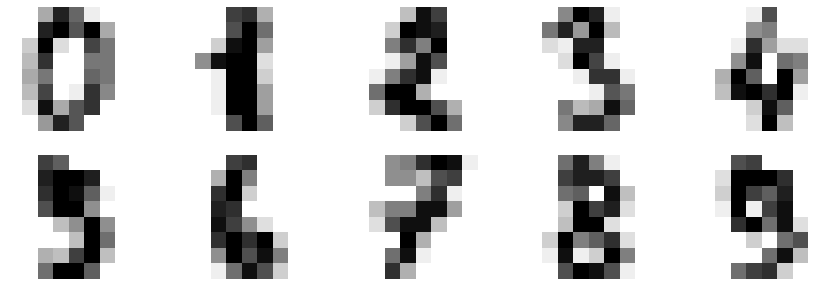

In [123]:
images = digits.drop('target', axis=1)

fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for i, (r, c) in enumerate(itertools.product(range(2), range(5))):
    img = images.iloc[i].values  
    img = img.reshape(8,8)
    axs[r, c].imshow(img, cmap='gray_r')
    axs[r, c].axis('off')

## K-Nearest Neighbors Model

While a lot of models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption, which allows to capture nonlinearity in the data.K-nearest neighbors compares every unseen observation to all training observations to look for similar observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

In [125]:
X = digits.drop('target', axis=1)
y = digits['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

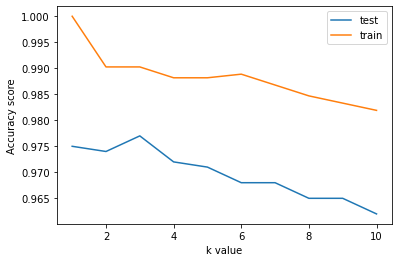

[0.975, 0.974, 0.977, 0.972, 0.971, 0.968, 0.968, 0.965, 0.965, 0.962]

In [126]:
train_accuracy = []
test_accuracy = []

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    cv_results = cross_validate(knn, X, y, cv=10)
    cv_accuracy = cv_results['test_score'].mean()
    test_accuracy.append(cv_accuracy.round(3))

plt.plot(range(1,len(test_accuracy)+1), test_accuracy)
plt.plot(range(1,len(train_accuracy)+1), train_accuracy)
plt.legend(["test", "train"])
plt.xlabel("k value")
plt.ylabel("Accuracy score")
plt.show()

test_accuracy

The k-nearest neighbors algorithm does a good job here. We got the best accuracy of 97,7% with a k of 3. We don't see much overfiiting here either.

But there are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

## Neural Networks

Let's now try neural networks. We will use the MLPClassifier package from scikit-learn. To find the best model we will compare networks with different numbers of neurons and hidden layers.

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multi

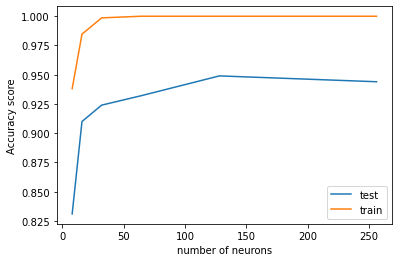

[0.831, 0.91, 0.924, 0.932, 0.949, 0.944]

In [138]:
neurons = [8, 16, 32, 64, 128, 256]
train_accuracy = []
test_accuracy = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,))
    mlp.fit(X_train, y_train)
    train_accuracy.append(mlp.score(X_train, y_train))
    cv_results = cross_validate(mlp, X, y, cv=5)
    cv_accuracy = cv_results['test_score'].mean()
    test_accuracy.append(cv_accuracy.round(3))

plt.plot(neurons, test_accuracy)
plt.plot(neurons, train_accuracy)
plt.legend(["test", "train"])
plt.xlabel("number of neurons")
plt.ylabel("Accuracy score")
plt.show()

test_accuracy

The plot shows that we have high accuracy scores with every number of neurons we've tested. It reaches kind of a plateau with 64 neurons (93%), after which the accuracy score barely increases. There also isn't much overfitting for the increasing number of neurons.

With that in mind let's test a model with two hidden layers to improve the results. We will keep the number of neutrons the same for both layers.

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multi

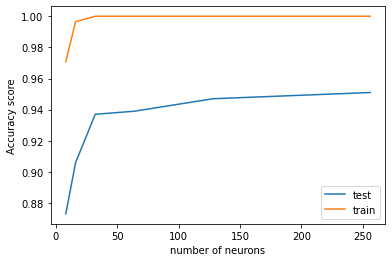

[0.873, 0.906, 0.937, 0.939, 0.947, 0.951]

In [130]:
neurons = [8, 16, 32, 64, 128, 256]
train_accuracy = []
test_accuracy = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n))
    mlp.fit(X_train, y_train)
    train_accuracy.append(mlp.score(X_train, y_train))
    cv_results = cross_validate(mlp, X, y, cv=5)
    cv_accuracy = cv_results['test_score'].mean()
    test_accuracy.append(cv_accuracy.round(3))

plt.plot(neurons, test_accuracy)
plt.plot(neurons, train_accuracy)
plt.legend(["test", "train"])
plt.xlabel("number of neurons")
plt.ylabel("Accuracy score")
plt.show()

test_accuracy

Two layers could barely improve the accuracy of the model. We got 95,1% as a maximum. To get the last percentages we finaly also try three hidden layers.

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multi

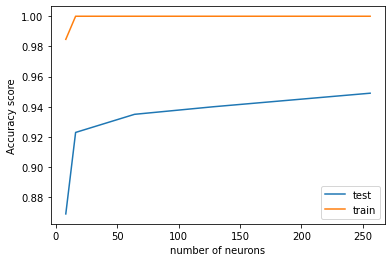

[0.869, 0.923, 0.927, 0.935, 0.94, 0.949]

In [131]:
neurons = [8, 16, 32, 64, 128, 256]
train_accuracy = []
test_accuracy = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n))
    mlp.fit(X_train, y_train)
    train_accuracy.append(mlp.score(X_train, y_train))
    cv_results = cross_validate(mlp, X, y, cv=5)
    cv_accuracy = cv_results['test_score'].mean()
    test_accuracy.append(cv_accuracy.round(3))

plt.plot(neurons, test_accuracy)
plt.plot(neurons, train_accuracy)
plt.legend(["test", "train"])
plt.xlabel("number of neurons")
plt.ylabel("Accuracy score")
plt.show()

test_accuracy

Actually the accuracy went down a little bit with 3 layers. 

## Conclusion

We can conclude that every model we've tested performs pretty well for classifying the the handwritten digits we've been given.